## Short Tutorial in the *Cohort* Class.
### Retention
Let's import the class and see insert a some retention numbers along with the amount of new users in the cohort.

To get more info on retenion see [retention tutorial.](https://pyfreya.readthedocs.io/en/latest/tutorials.html#short-tutorial-in-the-cohort-class)

In [1]:
from pyfreya import Cohort

new_users = 100
days_since_install = [1, 7, 30]
retention_values= [50, 15, 5]
facebook = Cohort(new_users, days_since_install, retention_values, name='facebook')
facebook

                        1
DaysSinceInstall         
0                     100
1                 50.0629
2                 32.1914
3                 24.8632
4                 20.6996
5                 17.9566
6                 15.9875
7                 14.4921
8                 13.3102
9                  12.348
10                11.5464
11                10.8662
12                10.2802
13                9.76917
14                9.31867
15                8.91795
16                8.55872
17                8.23447
18                7.94001
19                7.67118
20                7.42456
21                7.19733
22                6.98716
23                6.79206
24                6.61038
25                6.44069
26                6.28175
27                6.13252
28                5.99207
29                 5.8596
30                 5.7344
31                5.61586

**Note:** That the cohort class can also take a retention profile instead of actual retention data points.
The name given is not of any particular importance now, but when plotting various aggregates from multiple cohorts easily identifiable names are nice to have - is no name given a random one will be applied.

### Daily Active Users
Maybe similar cohorts comes in multiple days in a row. It is moddeled like this:

In [2]:
facebook.replicate_cohort(10)
facebook # Also accessible as facebook.df_user_dist as a pandas DataFrame

                       1        2        3        4        5        6        7        8        9        10
DaysSinceInstall                                                                                          
0                     100      100      100      100      100      100      100      100      100      100
1                 50.0629  50.0629  50.0629  50.0629  50.0629  50.0629  50.0629  50.0629  50.0629  50.0629
2                     NaN  32.1914  32.1914  32.1914  32.1914  32.1914  32.1914  32.1914  32.1914  32.1914
3                     NaN      NaN  24.8632  24.8632  24.8632  24.8632  24.8632  24.8632  24.8632  24.8632
4                     NaN      NaN      NaN  20.6996  20.6996  20.6996  20.6996  20.6996  20.6996  20.6996
5                     NaN      NaN      NaN      NaN  17.9566  17.9566  17.9566  17.9566  17.9566  17.9566
6                     NaN      NaN      NaN      NaN      NaN  15.9875  15.9875  15.9875  15.9875  15.9875
7                     NaN      NaN   

Well - its nice to see this user distribution, but how many daily active users do we have ? (also note the type is a pandas DataFrame)

In [3]:
print(type(facebook.df_dau))
facebook.df_dau

<class 'pandas.core.frame.DataFrame'>


dau
Date         
1         100
2     150.063
3     182.254
4     207.117
5     227.817
6     245.774
7     261.761
8     276.253
9     289.563
10    301.912

Since users are still active after the influx of 10 days lets see what it looks like after 30 days (10 days of user influx and 20 days of waiting):

In [4]:
facebook.replicate_cohort(10, 20)
facebook.df_dau

dau
Date         
1         100
2     150.063
3     182.254
4     207.117
5     227.817
6     245.774
7     261.761
8     276.253
9     289.563
10    301.912
11    213.458
12    174.261
13     152.35
14    137.256
15    125.875
16    116.836
17    109.408
18     103.15
19    97.7799
20     93.103
21    88.9812
22    85.3123
23    82.0192
24    79.0421
25    76.3338
26    73.8566
27    71.5796
28    69.4776
29    67.5297
30    65.7181

Enough numbers, lets plot some of this. First, lets plot the retention - maybe it fitted the data incorrectly:

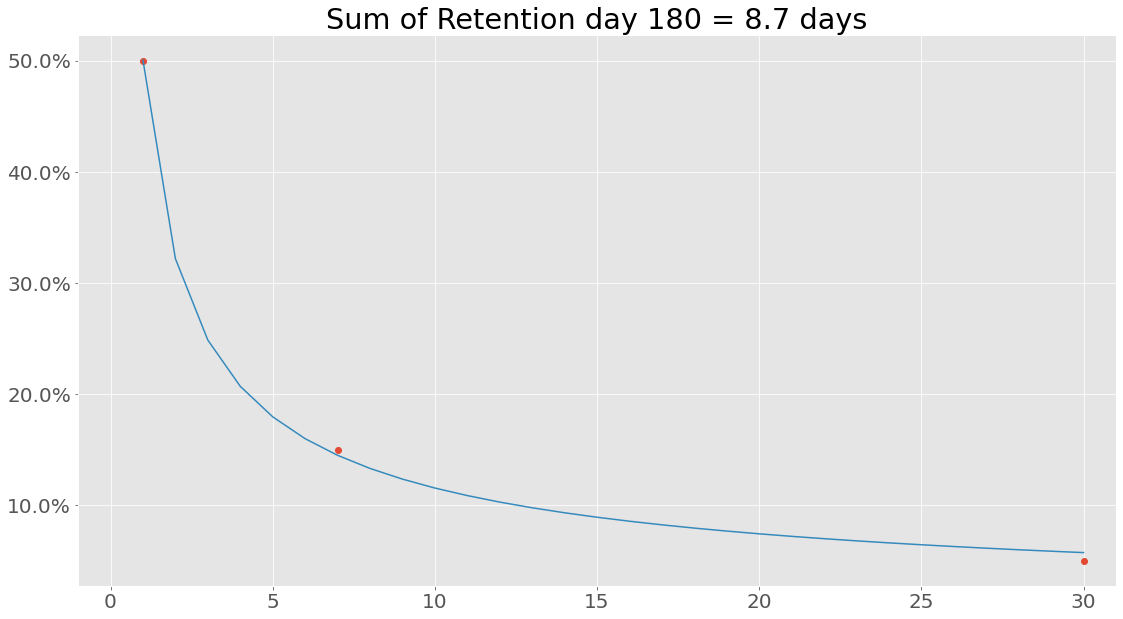

In [5]:
facebook.plot_retention()

How about dau?

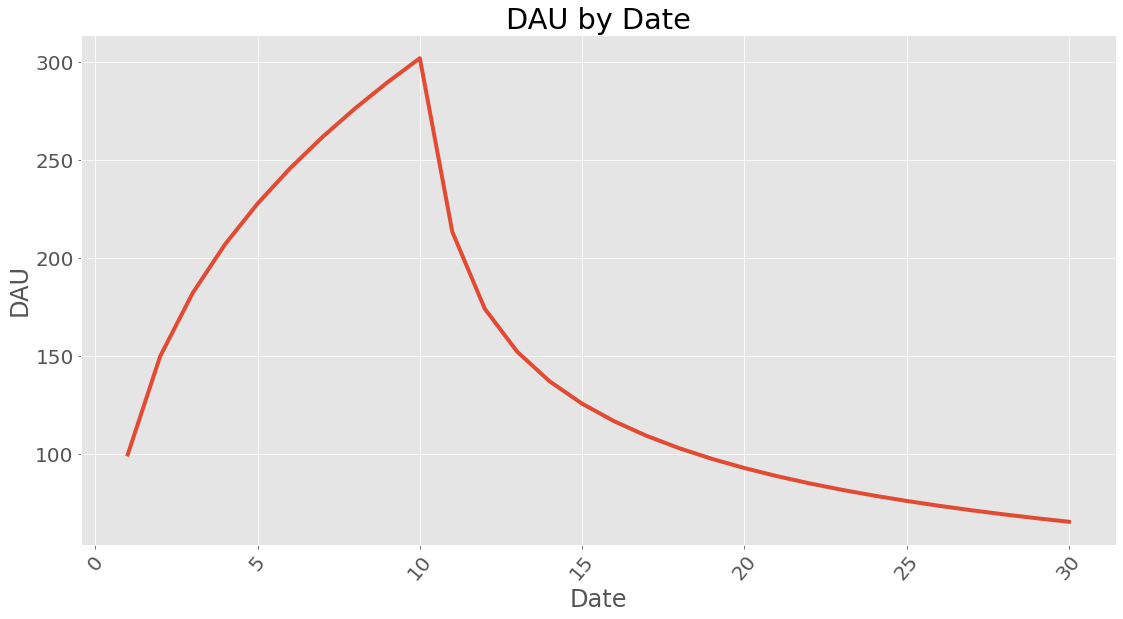

In [6]:
facebook.plot_dau()

If you wonder how long time it takes to reach a certain amount of dau it can be calculated. This does assume a steady influx of users given in *new_users* and with the retention profile calculated earlier.

In [7]:
facebook.days_to_dau(400)

21

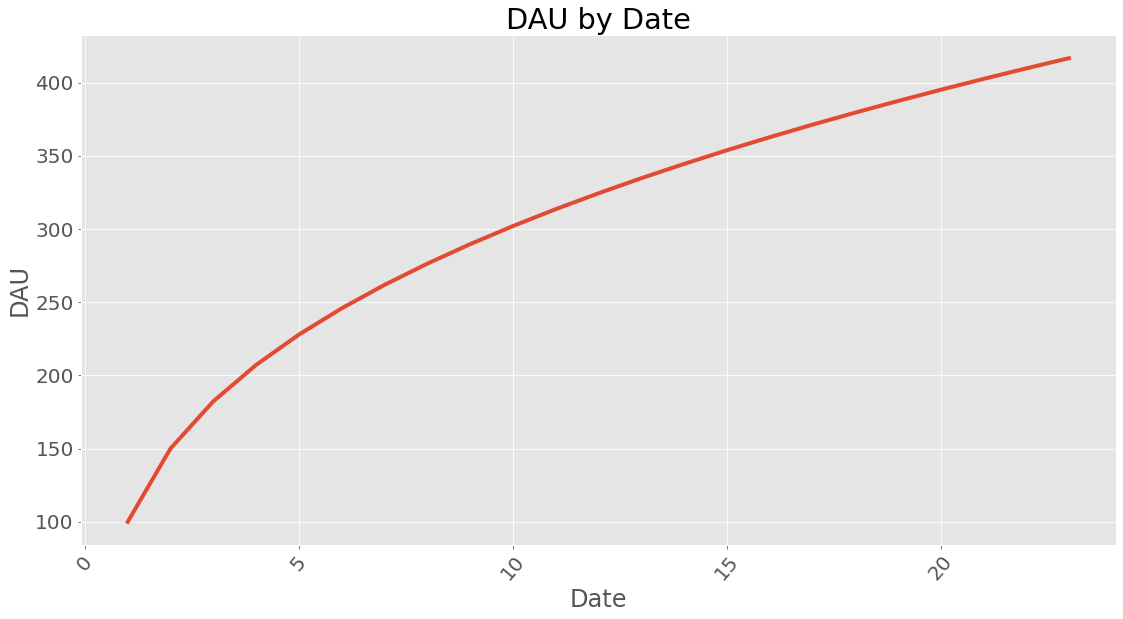

In [8]:
facebook.replicate_cohort(23)
facebook.plot_dau()

### Datetime
What kind of date is this anyway? Lets use proper human dates from the Gregorian calendar:

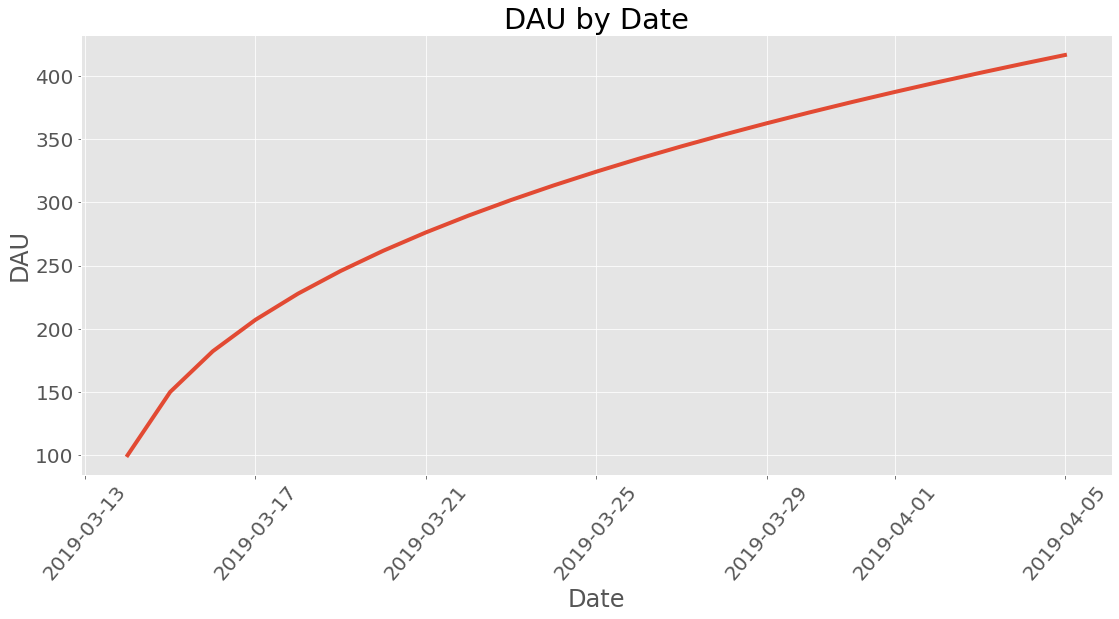

In [9]:
from datetime import datetime

start_date = datetime.strptime('2019-03-14', '%Y-%m-%d')
facebook.start_date = start_date
facebook.replicate_cohort(23) # we need to recalculate user distribution
facebook.plot_dau()

### Revenue
Well how much money did we earn? A premade revenue profile class called `ARPDAU` is imported and is initialized by setting the ARPDAU to a value.

In [10]:
from pyfreya.revenue import ARPDAU

facebook.replicate_cohort(23, 10)
revenue_profile = ARPDAU(2.1)
facebook.revenue_profile = revenue_profile
facebook.apply_revenue()
facebook.df_dau

dau  revenue
Date                        
2019-03-14      100      210
2019-03-15  150.063  315.132
2019-03-16  182.254  382.734
2019-03-17  207.117  434.947
2019-03-18  227.817  478.416
2019-03-19  245.774  516.125
2019-03-20  261.761  549.698
2019-03-21  276.253  580.132
2019-03-22  289.563  608.083
2019-03-23  301.912  634.014
2019-03-24  313.458  658.262
2019-03-25  324.324  681.081
2019-03-26  334.604  702.669
2019-03-27  344.374  723.184
2019-03-28  353.692  742.754
2019-03-29   362.61  761.481
2019-03-30  371.169  779.455
2019-03-31  379.403  796.747
2019-04-01  387.343  813.421
2019-04-02  395.015  829.531
2019-04-03  402.439  845.122
2019-04-04  409.636  860.237
2019-04-05  416.624   874.91
2019-04-06  323.416  679.173
2019-04-07  279.963  587.923
2019-04-08  254.212  533.846
2019-04-09  235.631  494.825
2019-04-10  221.064  464.234
2019-04-11  209.099  439.109
2019-04-12  198.971   417.84
2019-04-13  190.214  399.449
2019-04-14  182.519  383.291
2019-04-15  175.675  368.917

This can be plotted too!

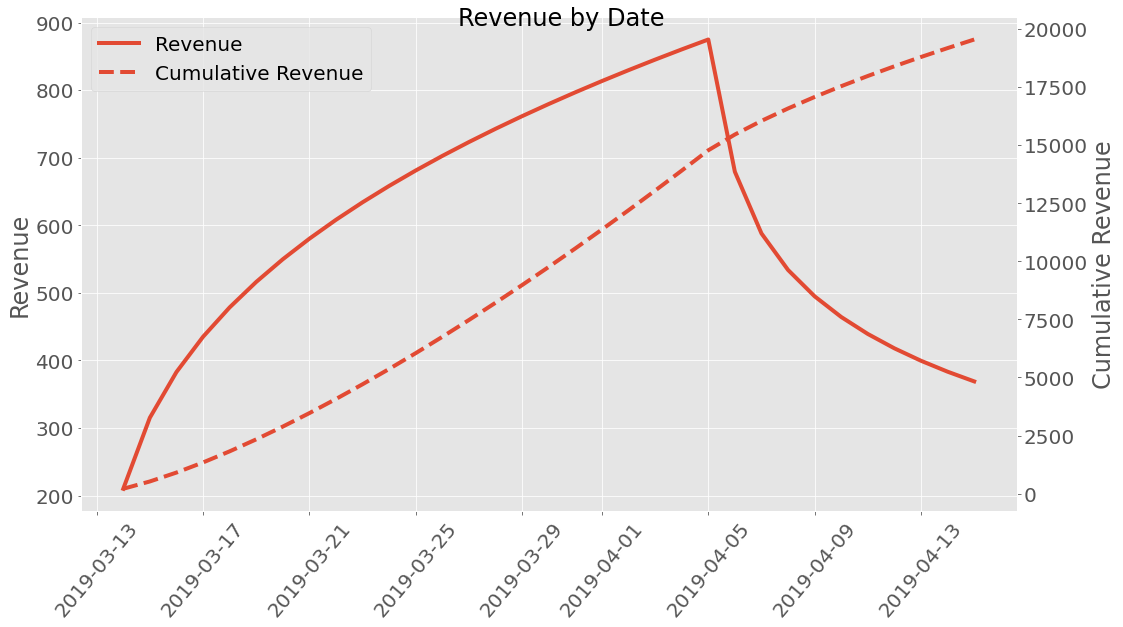

In [11]:
facebook.plot_revenue()

If we are interested in uncertainties the [Uncertainties](https://pypi.org/project/uncertainties/) package have been implemented. This can be used the following way:

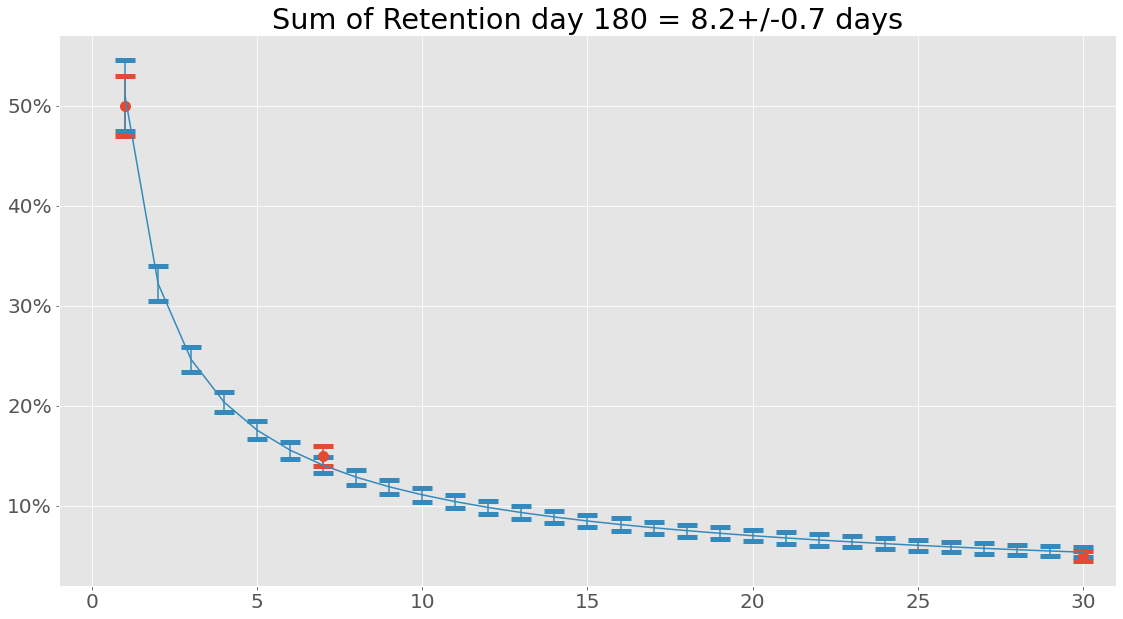

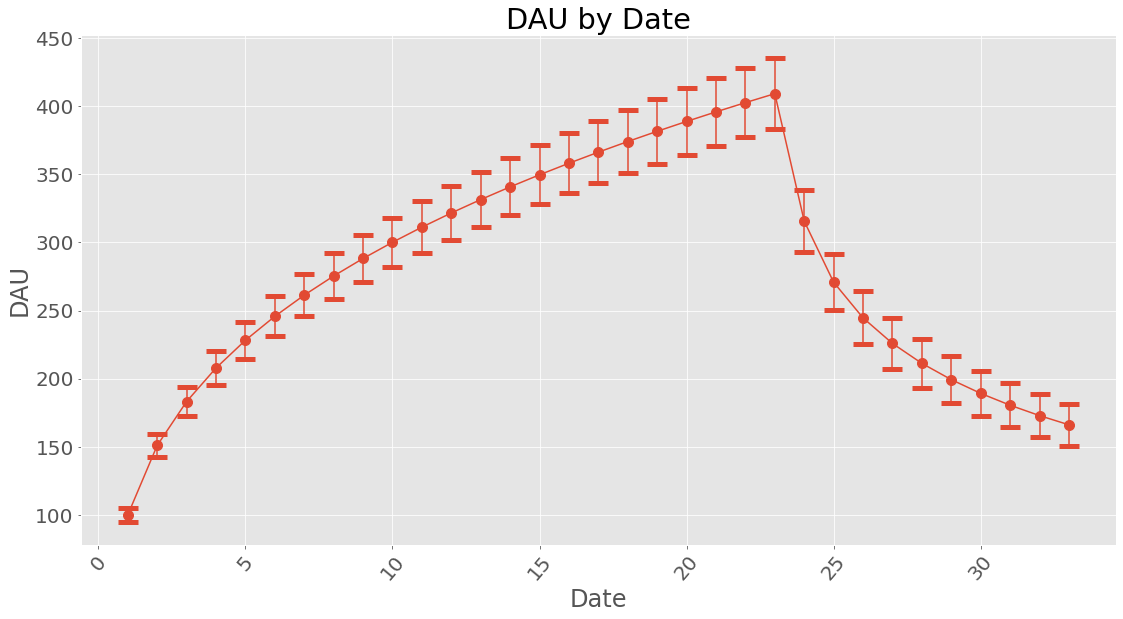

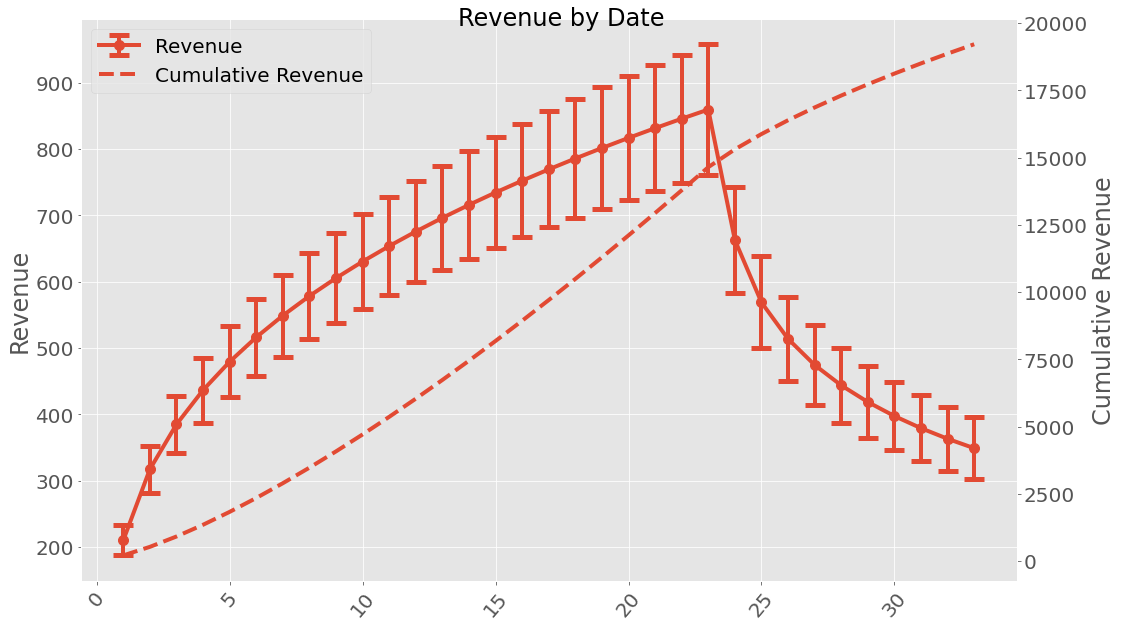

In [12]:
from pyfreya import ufloat

retention_values= [ufloat(50, 3), ufloat(15, 1), ufloat(5, 0.5)]
days_since_install = [1, 7, 30] # no uncertainties here.
new_users = ufloat(100, 5)
facebook = Cohort(new_users, days_since_install, retention_values)
facebook.revenue_profile = ARPDAU(ufloat(2.1, 0.2))
facebook.replicate_cohort(23, 10)
facebook.apply_revenue()
facebook.plot_retention()
facebook.plot_dau()
facebook.plot_revenue()

When working with uncertainties, the nominal values and the uncertainty values can be obtained with functions `nominal_values` and `std_devs`, respectively:

In [13]:
from pyfreya import nominal_values, std_devs

facebook.df_dau['dau']

Date
1      100+/-5
2      151+/-8
3     183+/-11
4     208+/-12
5     228+/-14
6     246+/-15
7     261+/-16
8     275+/-17
9     288+/-17
10    300+/-18
11    311+/-19
12    322+/-20
13    331+/-20
14    341+/-21
15    350+/-22
16    358+/-22
17    366+/-23
18    374+/-23
19    382+/-24
20    389+/-24
21    396+/-25
22    403+/-26
23    409+/-26
24    316+/-23
25    271+/-21
26    245+/-19
27    226+/-19
28    211+/-18
29    199+/-17
30    189+/-17
31    181+/-16
32    173+/-16
33    166+/-16
Name: dau, dtype: object

In [14]:
nominal_values(facebook.df_dau['dau'])

array([100.        , 151.00796688, 183.23144399, 207.86303692,
       228.21970943, 245.77844367, 261.3390633 , 275.38876963,
       288.24877584, 300.14329757, 311.23575048, 321.64933796,
       331.47951354, 340.80190942, 349.6775894 , 358.15664906,
       366.28075478, 374.08497899, 381.59915514, 388.84889718,
       395.85637904, 402.64093973, 409.21955908, 315.60723627,
       270.8093275 , 244.6301836 , 225.88786696, 211.27502302,
       199.32335936, 189.24093946, 180.54774509, 172.92912575,
       166.16687945])

In [15]:
std_devs(facebook.df_dau['dau'])

array([ 5.        ,  8.34935123, 10.56825389, 12.20066331, 13.51786087,
       14.6418741 , 15.63646161, 16.53872917, 17.37200759, 18.15183883,
       18.88905055, 19.59146105, 20.26488384, 20.91374916, 21.54150443,
       22.1508812 , 22.74407817, 23.32289008, 23.88880016, 24.44304807,
       24.98668034, 25.52058868, 26.04553928, 22.86365271, 20.63415691,
       19.40634919, 18.5255104 , 17.82742722, 17.24464372, 16.74232945,
       16.29990806, 15.90409195, 15.54574024])

It is possible to save a cohort class instance (using *pickle*) and loading it.

```python
facebook.save('facebook_revenue.pkl')
import pyfreya
facebook_loaded = pyfreya.load('facebook_revenue.pkl')
```